In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id'])

In [35]:

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
X = df[['SepalLengthCm', 'SepalWidthCm']].values
y = df['Species'].values

In [37]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [40]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))

✅ Accuracy: 0.7


Text(0, 0.5, 'Actual')

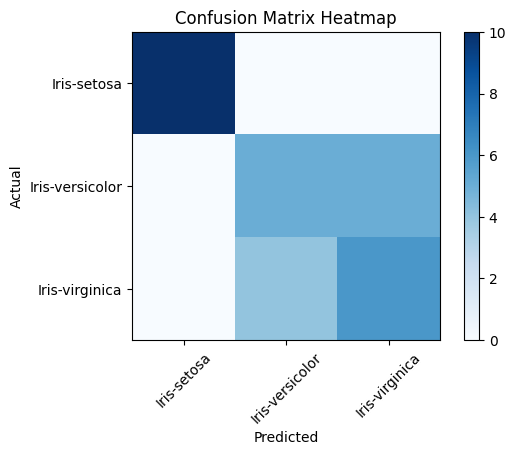

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.colorbar()
plt.xticks(np.arange(len(le.classes_)), le.classes_, rotation=45)
plt.yticks(np.arange(len(le.classes_)), le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')

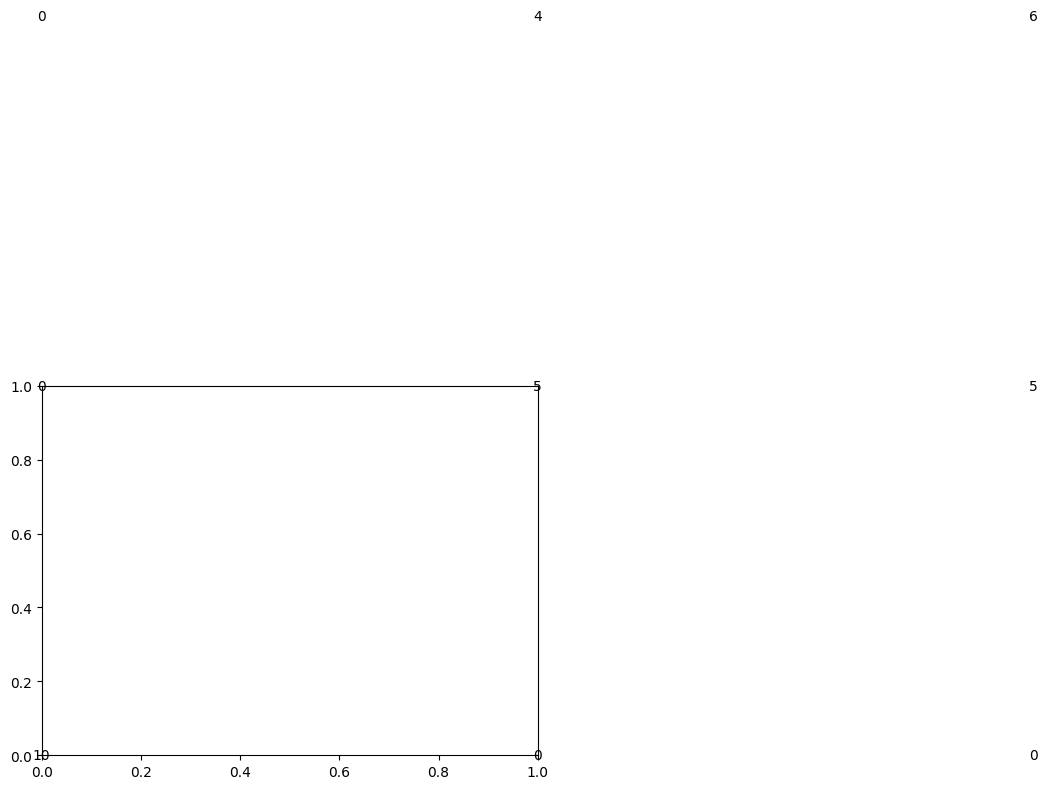

In [42]:
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()



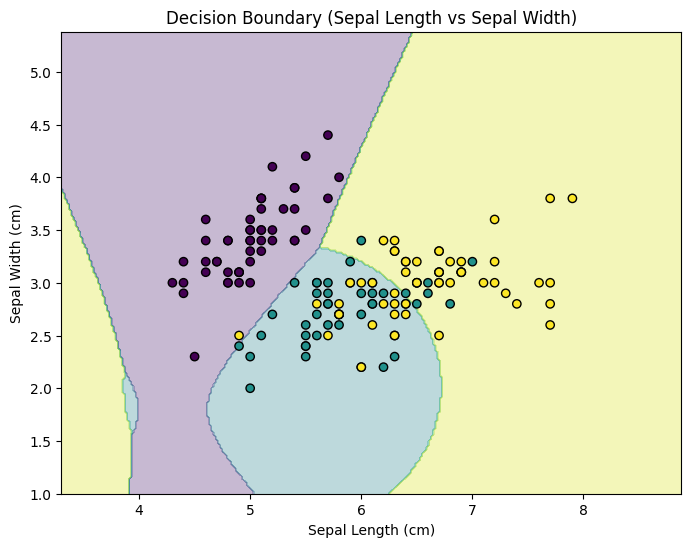

In [43]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict each point on the grid
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)           # Decision areas
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, edgecolor='k')  # Real points
plt.title('Decision Boundary (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()
